# MIDTERM  - MATH 387
## Mathew Wright
** 260681105 **

## Part I. Theory

#### a)

Consider the Taylor expansion of $f$ around $h$, evaluated at $0$. Since $f \in C^3$, $\exists \; \zeta_1 \in (-h, h)$ such that  

$$ f(h) = f(0) + hf'(0) + \frac{h^2}{2}f''(0) + \frac{h^3}{6}f'''(\zeta_1) $$

Now, the Taylor expansion of $f$ around $-h$ evaluated at $0$ gives  

$$ f(-h) = f(0) - hf'(0) + \frac{h^2}{2}f''(0) - \frac{h^3}{6}f'''(\zeta_2) $$  

Subtracting these two equations gives  

$$ f(h) - f(-h) = 2hf'(0) + \frac{h^3}{6}(f'''(\zeta_1) + f'''(\zeta_2)) $$  

Dividing by $2h$ and rearanging, and we get  

$$ \frac{f(h) - f(-h)}{2h} - f'(0) = \frac{h^2}{6}\frac{f'''(\zeta_1) + f'''(\zeta_2)}{2} $$  

Since $f \in C^3$, $f'''$ is continuous. So, by the Intermediate Value Theorem, $ \exists \; \zeta \in [\zeta_1, \zeta_2]$ or $(\zeta_2, \zeta_1)$ if $\zeta_2 < \zeta_1$, such that  

$$ f'''(\zeta) = \frac{f'''(\zeta_1) + f'''(\zeta_2)}{2}$$  

Since $\zeta_1, \zeta_2 \in (-h, h)$, we have that $\zeta \in (-h, h)$.  


Now, putting everything together, we get  
$$
\begin{aligned}
& \tilde{D}_h - f'(0) = \frac{f(h) + \delta f(h) - f(-h) - \delta f(-h)}{2h} - f'(0) \\
& = \frac{f(h) - f(-h)}{2h} - f'(0) + \frac{\delta f(h) - \delta f(-h)}{2h} \\
& = \frac{h^2}{6}f'''(\zeta) + \frac{\delta f(h) - \delta f(-h)}{2h}
\end{aligned}  
$$

Which is as desired.

b)

$$
\begin{aligned}
|\tilde{D}_h - f'(0)| 
& = \left|\frac{h^2}{6}f'''(\zeta) + \frac{\delta f(h) - \delta f(-h)}{2h} \right| \\
& \leq \frac{h^2}{6}|f'''(\zeta)| + \frac{|\delta f(h) - \delta f(-h)|}{2h} \\
& \leq \frac{h^2}{6}M + \frac{|\delta f(h)| + |\delta f(-h)|}{2h} \\
& \leq \frac{h^2}{6}M + \frac{2\epsilon}{2h} \\
& = \frac{h^2}{6}M + \frac{\epsilon}{h}
\end{aligned}
$$

In [148]:
import numpy as np
import matplotlib.pyplot as plt

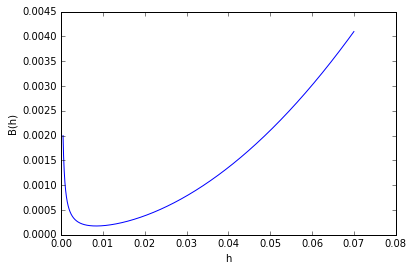

In [157]:
epsilon = 1e-6
M = 5
B = lambda h: epsilon/h + M*h**2 / 6
h = np.linspace(0.0005, 0.07, 10000)

plt.plot(h, B(h))
plt.xlabel("h")
plt.ylabel("B(h)")
plt.show()

$$
\begin{aligned}
0 = B'(h) &= \frac{2hM}{6} - \frac{\epsilon}{h^2} = \frac{hM}{3} - \frac{\epsilon}{h^2} \\
& \implies \frac{h^3M}{3} = \epsilon \\
& \implies h^3 = \frac{3\epsilon}{M} \\
& \implies h = \left(\frac{3\epsilon}{M}\right)^{1/3}
\end{aligned}
$$

This is the minimum of $B$, since $B''(h) = \frac{M}{3} + 

This corresponds to what we see in the graph, since we get that the above $B(h)$ is minimized at  

$$ h = \left(\frac{3\epsilon}{M}\right)^{1/3} = \left(\frac{3*10^{-6}}{5}\right)^{1/3} \approx 0.008434$$  


It's not a good idea to choose $h$ too small, since, as we can see in the graph, $B(h)$ blows up as $h \downarrow 0$  
We can also see this analytically, since 
$$ \lim_{h \downarrow 0}B(h) = \lim_{h \downarrow 0}\frac{h^2}{6}M + \frac{\epsilon}{h} = 0 + \infty = +\infty $$

## Part II. Lab

a)

In [150]:
import scipy.interpolate

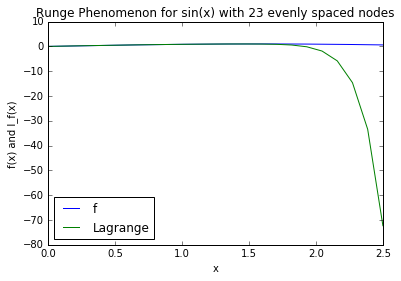

In [151]:
f = lambda x: np.sin(x)
start, end = 0, 2.5
x = np.linspace(start, end, 10000)
n = 23
l_points = np.linspace(start, end, n)
l_f = scipy.interpolate.lagrange(l_points, f(l_points))
plt.plot(x, f(x), label="f")
plt.plot(l_points, l_f(l_points), label="Lagrange")
plt.xlabel("x")
plt.ylabel("f(x) and l_f(x)")
plt.title("Runge Phenomenon for sin(x) with {} evenly spaced nodes".format(n))
plt.legend(loc='lower left')
plt.show()

In the above plot, we can see that near the end of the interval, the functions $f(x) = sin(x)$ and the Lagrange interpolated polynomial diverge significantly.

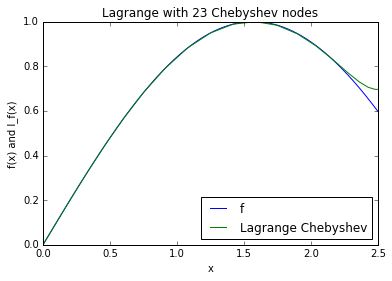

In [152]:
def chebyshev(a, b, n, k):
    return 0.5*(a + b) + 0.5*(b - a)*np.cos((2*k - 1) / (2*n) * np.pi)

def chebyshev_nodes(a, b, n):
    return np.array([chebyshev(a,b,n,k) for k in range(1, n+1)])

chebyshev_points = chebyshev_nodes(start, end, n)
lagrange_chebyshev = scipy.interpolate.lagrange(chebyshev_points, f(chebyshev_points))
plt.plot(x, f(x), label="f")
plt.plot(chebyshev_points, lagrange_chebyshev(chebyshev_points), label="Lagrange Chebyshev")
plt.xlabel("x")
plt.ylabel("f(x) and l_f(x)")
plt.title("Lagrange with {} Chebyshev nodes".format(n))
plt.legend(loc="lower right")
plt.show()

We can still see the Runge phenomenon with the Chebyshev nodes, but there is a significant improvement over the equally spaced nodes.

In [153]:
import scipy.misc

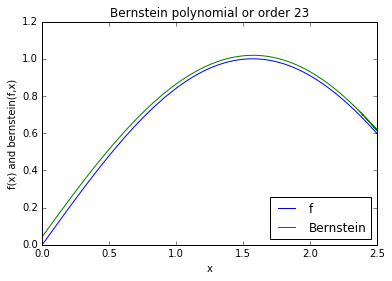

In [154]:
def bernstein_basis(n, v):
    return lambda x: scipy.misc.comb(n, v)*np.power(x, v)*np.power(1 - x, n-v)

def bernstein(f, n):
    basis = [bernstein_basis(n, v) for v in range(n+1)]
    return lambda x: sum(f((i+1)/n) * b(x) for i, b in enumerate(basis))


bernstein_f = bernstein(f, n)
plt.plot(x, f(x), label="f")
plt.plot(x, bernstein_f(x), label="Bernstein")
plt.xlabel("x")
plt.ylabel("f(x) and bernstein(f,x)")
plt.title("Bernstein polynomial or order {}".format(n))
plt.legend(loc="lower right")
plt.show()

In this case, the Bernstein polynomial does not exhibit the Runge phenomenon. So for approximating points near the ends of the interval, this approach is a significant improvement. However, the Lagrange interpolation using Chebyschev nodes was more accurate towards the middle of the interval.